# Bota de fútbol más utilizada por posición del jugador utilizando árboles de decisión

---



Partimos de un dataset en el que aparecen una lista de jugadores que juegan en distintas posiciones del campo y la marca y modelo de bota que utilizan.

Como tenemos varias marcas de botas, vamos a dividir el dataset por marca. Y posteriormente vamos a generar un modelo supervisado aplicando un algoritmo de machine learning de árbol de decisión de clasificación.

El objetivo será predecir el modelo de bota de un futbolista en función de la posición que ocupa en el campo.

## Importar librerias de Python

In [0]:
import numpy as np
import pandas as pd

## Dataset

In [2]:
dataset = pd.read_csv('football_boots.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
player     140 non-null object
country    140 non-null object
pos        140 non-null int64
brand      140 non-null object
model      140 non-null object
dtypes: int64(1), object(4)
memory usage: 5.6+ KB


In [3]:
dataset

,player,country,pos,brand,model
0,Navas,Costa Rica,1,adidas,predator
1,ter Stegen,Germany,1,adidas,predator
2,Oblak,Slovenia,1,nike,tiempo
3,Rico,Spain,1,adidas,predator
4,Buffon,Italy,1,puma,one
...,...,...,...,...,...
135,Gabriel Jesús,Brazil,7,adidas,x
136,Müller,Germany,7,adidas,x
137,Lewandowski,Poland,7,nike,hipervenom
138,Cavani,Uruguay,7,nike,hipervenom


## División del dataset por marca

In [4]:
dataset_adi = dataset[dataset.brand == "adidas"]
dataset_nik = dataset[dataset.brand == "nike"]

print("Tamaño dataset adidas:", dataset_adi.shape)
print("Tamaño dataset nike:", dataset_nik.shape)

Tamaño dataset adidas: (51, 5)
Tamaño dataset nike: (76, 5)


## Árboles de decisión de clasificación

### Modelo para botas de marca adidas

In [5]:
x = dataset_adi[['pos']].values
y = dataset_adi['model'].values
from sklearn.tree import DecisionTreeClassifier
modelo_arbol_adi = DecisionTreeClassifier()
modelo_arbol_adi.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Modelo para botas de marca nike

In [6]:
x = dataset_nik[['pos']].values
y = dataset_nik['model'].values
modelo_arbol_nik = DecisionTreeClassifier()
modelo_arbol_nik.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Árboles de decisión

In [0]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "arboles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "imagenes", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Árbol de decisión para la marca adidas

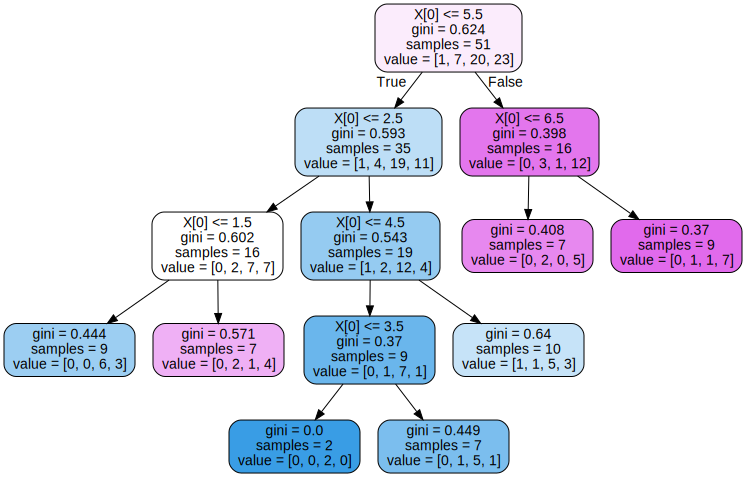

In [8]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(modelo_arbol_adi, out_file=os.path.join(IMAGES_PATH, "arbol_adi.dot"), rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "arbol_adi.dot"))

### Árbol de decisión para la marca nike

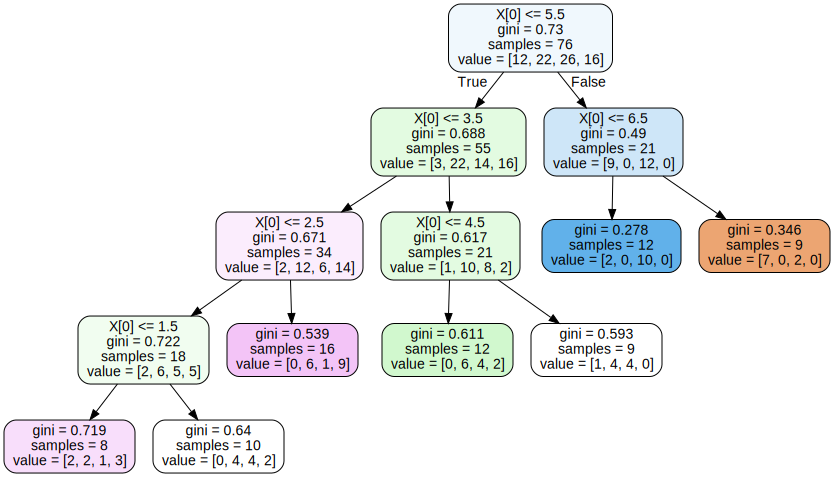

In [9]:
export_graphviz(modelo_arbol_nik, out_file=os.path.join(IMAGES_PATH, "arbol_nik.dot"), rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "arbol_nik.dot"))

## Fotografías de las botas

In [0]:
from PIL import Image

def imagen_adi(id):
  if (id[0] == '11pro'):
    return 'adidas11pro.jpeg'
  if (id[0] == 'nemeziz'):
    return 'adidasnemeziz.jpeg'  
  if (id[0] == 'predator'):
    return 'adidaspredator.jpeg'
  if (id[0] == 'x'):
    return 'adidasx.jpeg'

def imagen_nik(id):
  if (id[0] == 'hipervenom'):
    return 'nikehipervenom.jpeg'
  if (id[0] == 'magista'):
    return 'nikemagista.jpeg'  
  if (id[0] == 'mercurial'):
    return 'nikemercurial.jpeg'
  if (id[0] == 'tiempo'):
    return 'niketiempo.jpeg'  

## Predicción de modelo de bota por posición en el campo

## 1 Portero

### Adidas

In [11]:
print("Modelo:", modelo_arbol_adi.predict([[1]])[0])

Modelo: predator


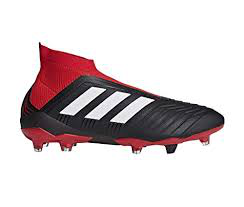

In [12]:
Image.open(imagen_adi(modelo_arbol_adi.predict([[1]])))

### Nike

In [13]:
print("Modelo:", modelo_arbol_nik.predict([[1]])[0])

Modelo: tiempo


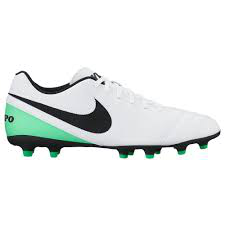

In [14]:
Image.open(imagen_nik(modelo_arbol_nik.predict([[1]])))

## 2 Defensa Lateral

### Adidas

In [15]:
print("Modelo:", modelo_arbol_adi.predict([[2]])[0])

Modelo: x


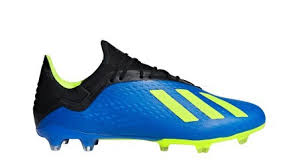

In [16]:
Image.open(imagen_adi(modelo_arbol_adi.predict([[2]])))

### Nike

In [17]:
print("Modelo:", modelo_arbol_nik.predict([[2]])[0])

Modelo: magista


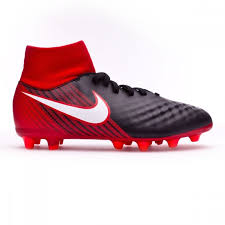

In [18]:
Image.open(imagen_nik(modelo_arbol_nik.predict([[2]])))

## 3 Defensa Central

### Adidas

In [19]:
print("Modelo:", modelo_arbol_adi.predict([[3]])[0])

Modelo: predator


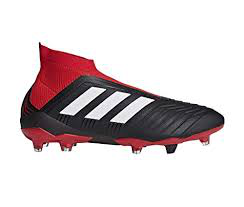

In [20]:
Image.open(imagen_adi(modelo_arbol_adi.predict([[3]])))

### Nike

In [21]:
print("Modelo:", modelo_arbol_nik.predict([[1]])[0])

Modelo: tiempo


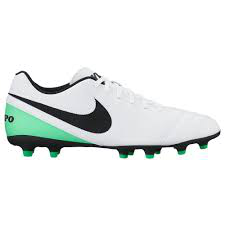

In [22]:
Image.open(imagen_nik(modelo_arbol_nik.predict([[3]])))

## 4 Centrocampista defensivo

### Adidas

In [23]:
print("Modelo:", modelo_arbol_adi.predict([[4]])[0])

Modelo: predator


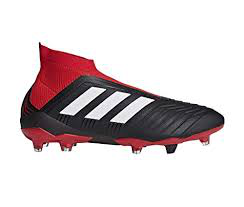

In [24]:
Image.open(imagen_adi(modelo_arbol_adi.predict([[4]])))

### Nike

In [25]:
print("Modelo:", modelo_arbol_nik.predict([[4]])[0])

Modelo: magista


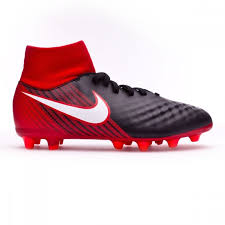

In [26]:
Image.open(imagen_nik(modelo_arbol_nik.predict([[4]])))

## 5 Centrocampista ofensivo

### Adidas

In [27]:
print("Modelo:", modelo_arbol_adi.predict([[5]])[0])

Modelo: predator


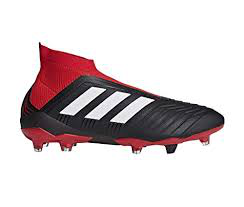

In [28]:
Image.open(imagen_adi(modelo_arbol_adi.predict([[5]])))

### Nike

In [29]:
print("Modelo:", modelo_arbol_nik.predict([[5]])[0])

Modelo: magista


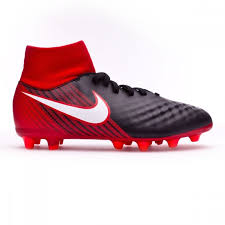

In [30]:
Image.open(imagen_nik(modelo_arbol_nik.predict([[5]])))

## 6 Extremo

### Adidas

In [0]:
print("Modelo:", modelo_arbol_adi.predict([[6]])[0])

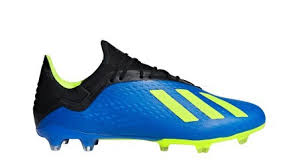

In [0]:
Image.open(imagen_adi(modelo_arbol_adi.predict([[6]])))

### Nike

In [0]:
print("Modelo:", modelo_arbol_nik.predict([[6]])[0])

Modelo: mercurial


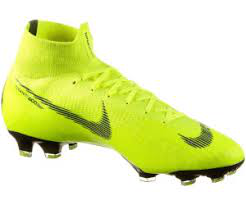

In [0]:
Image.open(imagen_nik(modelo_arbol_nik.predict([[6]])))

## 7 Delantero Centro

### Adidas

In [0]:
print("Modelo:", modelo_arbol_adi.predict([[7]])[0])

Modelo: x


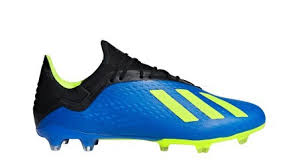

In [0]:
Image.open(imagen_adi(modelo_arbol_adi.predict([[7]])))

### Nike

In [0]:
print("Modelo:", modelo_arbol_nik.predict([[7]])[0])

Modelo: hipervenom


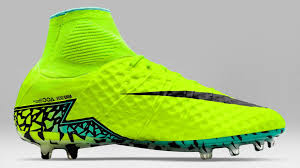

In [0]:
Image.open(imagen_nik(modelo_arbol_nik.predict([[7]])))